In [1]:
import uproot 
import awkward as ak
import numpy as np
file = [uproot.open("../../coffea_dev/root_files_may18/rv02-02.sv02-02.mILD_l5_o1_v02.E250-SetA.I402004.Pe2e2h.eR.pL.n000.d_dstm_15090_0.slcio.edm4hep.root"),
        uproot.open("../../coffea_dev/root_files_may18/rv02-02.sv02-02.mILD_l5_o1_v02.E250-SetA.I402004.Pe2e2h.eR.pL.n000.d_dstm_15090_1.slcio.edm4hep.root"),
        uproot.open("../../coffea_dev/root_files_may18/rv02-02.sv02-02.mILD_l5_o1_v02.E250-SetA.I402004.Pe2e2h.eR.pL.n000.d_dstm_15090_2.slcio.edm4hep.root")]

events = [file[n]['events'] for n in range(3)]

import matplotlib.pyplot as plt
import numpy as np

### Array Set-Up
Run the below cells to set up needed arrays for everything else.

In [2]:
pdgids = (events[2][f'MCParticlesSkimmed/MCParticlesSkimmed.PDG']).array()
status = (events[2][f'MCParticlesSkimmed/MCParticlesSkimmed.generatorStatus']).array()
momentum = np.sqrt((events[2][f'MCParticlesSkimmed/MCParticlesSkimmed.momentum.x']).array()**2 + (events[2][f'MCParticlesSkimmed/MCParticlesSkimmed.momentum.y']).array()**2 + (events[2][f'MCParticlesSkimmed/MCParticlesSkimmed.momentum.z']).array()**2)

In [3]:
# parents
shape = (events[2][f'MCParticlesSkimmed/MCParticlesSkimmed.parents_end']).array() - (events[2][f'MCParticlesSkimmed/MCParticlesSkimmed.parents_begin']).array() 

par_inds = ak.unflatten((events[2][f'MCParticlesSkimmed#{0}/MCParticlesSkimmed#{0}.index']).array(),ak.flatten(shape),axis=1)



In [4]:
# daughters
shape = (events[2][f'MCParticlesSkimmed/MCParticlesSkimmed.daughters_end']).array() - (events[2][f'MCParticlesSkimmed/MCParticlesSkimmed.daughters_begin']).array()

daugh_inds = ak.unflatten((events[2][f'MCParticlesSkimmed#{1}/MCParticlesSkimmed#{1}.index']).array(),ak.flatten(shape),axis=1)


### Looking at parentage

location of z bosons:

In [226]:
ak.local_index(ak.num(ak.local_index(pdgids)[pdgids == 23]))[ak.num(ak.local_index(pdgids)[pdgids == 23]) != 0]

<Array [1, 15, 41, 43, 52, ..., 9342, 9352, 9360, 9382] type='271 * int64'>

In [243]:
daugh_inds[1][12]

<Array [15, 16] type='2 * int32'>

In [245]:
pdgids[1][16]

-12

check which particles have no parents and look at status

In [228]:
# no parents
ak.local_index(ak.firsts(ak.pad_none(par_inds[0],1,axis=1)))[ak.fill_none(ak.firsts(ak.pad_none(par_inds[0],1,axis=1)),-1) == -1]


<Array [0, 1, 171, 172, 179, ..., 231, 232, 233, 234, 235] type='56 * int64'>

In [276]:
# no children
ak.local_index(ak.firsts(ak.pad_none(daugh_inds[0],1,axis=1)))[ak.fill_none(ak.firsts(ak.pad_none(daugh_inds[0],1,axis=1)),-1) == -1]


<Array [6, 7, 14, 17, 19, 20, ..., 229, 230, 231, 232, 233] type='138 * int64'>

In [231]:
status[0][no_child]

<Array [1, 1, 1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1, 1] type='138 * int32'>

In [204]:
# ak.local_index(status[0])[status[0]==1]

## Trace Up Loop

In [5]:
def trace_par(event,start_ind,output=True,print_inds=False,all_inds=False,all_pdgs=False):
    '''
    Parameters:
    ----------
    
    event :: int 
        integer slice to determine event 
    
    start_ind :: int
        index of particle to start tracing from 
    
    output :: bool (optional)
        print the pdg business
    
    print_inds :: bool (optional)
        print indices of particles at every stage 
    
    all_inds :: bool (optional)
        return all indices in an awkward array 
    
    all_pdgs :: bool (optional)
        return all pdgids in an awkward array 
    
    Returns:
    -------
    
    inds :: array (optional)
        list of all indices returned if all_inds is set to True 
    
    '''
    flag = True

    curr_ind = ak.Array([-1])
    par_ind = ak.Array([start_ind])
    
    if all_inds:
        ind_lst = []
    if all_pdgs:
        pdglst = []
    
    while flag:
        curr_ind = par_ind
        if output:
            if print_inds:
                print('PDG IDs:',pdgids[event][curr_ind],'\t indices:',curr_ind)
            else:
                print('PDG IDs:',pdgids[event][curr_ind])

        par_ind = np.unique(ak.flatten(par_inds[event][curr_ind],axis=-1))
        
        if all_inds:
            ind_lst.append(list(curr_ind))
        if all_pdgs:
            pdglst.append(pdgids[event][curr_ind])

        if len(curr_ind) == len(par_ind) and ak.any(ak.to_regular(curr_ind,axis=0) == ak.to_regular(par_ind,axis=0)):
            flag = False
#             print('weird out')
        elif len(par_ind) == 0:
            flag = False
            if output:
                print('final indices:', curr_ind)

    if all_inds and all_pdgs:
        return (ind_lst,pdglst)
    elif all_inds:
        return ind_lst
    elif all_pdgs:
        return pdglst

In [221]:
# trees of all charged pions
event = 0 
start_inds = ak.local_index(pdgids[event])[pdgids[event] == 211]

for n in range(len(start_inds)):
    print('status of original particle:',status[event][start_inds[n]])
    trace_par(event,start_inds[n])
    print('\n\n')

status of original particle: 1
PDG IDs: [211]
PDG IDs: [223]
PDG IDs: [92]
PDG IDs: [5, 21, 21, 21, -5]
PDG IDs: [5, 21, 21, -5, 21]
PDG IDs: [5, -5, -5]
PDG IDs: [94, -5]
PDG IDs: [5, -5, 94]
PDG IDs: [5, -5, 5, -5]
PDG IDs: [25, 5, -5]
PDG IDs: [11, -11, 25]
PDG IDs: [11, -11, 11, -11]
PDG IDs: [11, -11, 11, -11]
PDG IDs: [11, -11]
final indices: [0, 1]



status of original particle: 1
PDG IDs: [211]
PDG IDs: [213]
PDG IDs: [92]
PDG IDs: [5, 21, 21, 21, -5]
PDG IDs: [5, 21, 21, -5, 21]
PDG IDs: [5, -5, -5]
PDG IDs: [94, -5]
PDG IDs: [5, -5, 94]
PDG IDs: [5, -5, 5, -5]
PDG IDs: [25, 5, -5]
PDG IDs: [11, -11, 25]
PDG IDs: [11, -11, 11, -11]
PDG IDs: [11, -11, 11, -11]
PDG IDs: [11, -11]
final indices: [0, 1]



status of original particle: 1
PDG IDs: [211]
PDG IDs: [213]
PDG IDs: [92]
PDG IDs: [5, 21, 21, 21, -5]
PDG IDs: [5, 21, 21, -5, 21]
PDG IDs: [5, -5, -5]
PDG IDs: [94, -5]
PDG IDs: [5, -5, 94]
PDG IDs: [5, -5, 5, -5]
PDG IDs: [25, 5, -5]
PDG IDs: [11, -11, 25]
PDG IDs: [11, -11

In [294]:
np.unique(pdgids[event])

<Array [-3224, -3122, -2212, ..., 1000060110, 1000100220] type='42 * int32'>

In [18]:
event = 0
start_inds = ak.local_index(pdgids[event])[pdgids[event] == -3122]

for n in range(len(start_inds)):
    print('status of original particle:',status[event][start_inds[n]])
    print(trace_par(event,start_inds[n],all_pdgs=True))
    print('\n\n')

status of original particle: 2
PDG IDs: [-3122]
PDG IDs: [-3224]
PDG IDs: [92]
PDG IDs: [5, 21, 21, 21, -5]
PDG IDs: [5, 21, 21, -5, 21]
PDG IDs: [5, -5, -5]
PDG IDs: [94, -5]
PDG IDs: [5, -5, 94]
PDG IDs: [5, -5, 5, -5]
PDG IDs: [25, 5, -5]
PDG IDs: [11, -11, 25]
PDG IDs: [11, -11, 11, -11]
PDG IDs: [11, -11, 11, -11]
PDG IDs: [11, -11]
final indices: [0, 1]
[<Array [-3122] type='1 * int32'>, <Array [-3224] type='1 * int32'>, <Array [92] type='1 * int32'>, <Array [5, 21, 21, 21, -5] type='5 * int32'>, <Array [5, 21, 21, -5, 21] type='5 * int32'>, <Array [5, -5, -5] type='3 * int32'>, <Array [94, -5] type='2 * int32'>, <Array [5, -5, 94] type='3 * int32'>, <Array [5, -5, 5, -5] type='4 * int32'>, <Array [25, 5, -5] type='3 * int32'>, <Array [11, -11, 25] type='3 * int32'>, <Array [11, -11, 11, -11] type='4 * int32'>, <Array [11, -11, 11, -11] type='4 * int32'>, <Array [11, -11] type='2 * int32'>]





In [295]:
event = 0
start_inds = ak.local_index(pdgids[event])[pdgids[event] == -3122]

for n in range(len(start_inds)):
    print('status of original particle:',status[event][start_inds[n]])
    trace_par(event,start_inds[n])
    print('\n\n')

status of original particle: 2
PDG IDs: [-3122]
PDG IDs: [-3224]
PDG IDs: [92]
PDG IDs: [5, 21, 21, 21, -5]
PDG IDs: [5, 21, 21, -5, 21]
PDG IDs: [5, -5, -5]
PDG IDs: [94, -5]
PDG IDs: [5, -5, 94]
PDG IDs: [5, -5, 5, -5]
PDG IDs: [25, 5, -5]
PDG IDs: [11, -11, 25]
PDG IDs: [11, -11, 11, -11]
PDG IDs: [11, -11, 11, -11]
PDG IDs: [11, -11]
final indices: [0, 1]





In [305]:
! pdgid 3122

Λ⁰


## Best PDGID Place
https://twiki.cern.ch/twiki/pub/Main/ZhuDataProduction/PDG.py.txt

## Status Stuff

0 empty line \
1 undecayed particle, stable in the generator \
2 particle decayed in the generator \
3 documentation line \
4 original particles?

(array([ 459385.,       0., 1124226.,       0.,  732607.,       0.,
          63848.,       0.,   18800.,       0.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

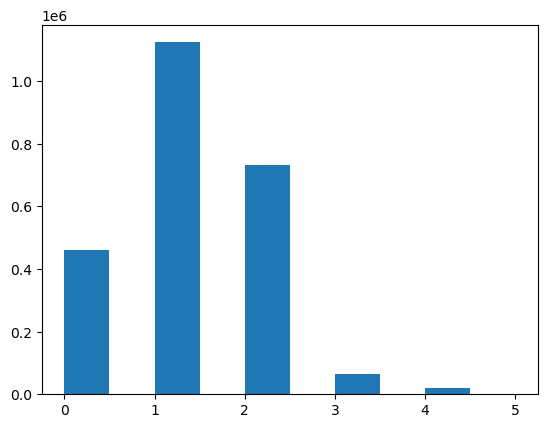

In [5]:
plt.close(1);plt.figure(1)
plt.hist(ak.flatten(status),range=(0,5),bins=10,histtype='barstacked')

## Tracing Which Particles Come from Higgs

In [9]:
def daughter_tree(event,start_ind):
    '''
    returns list of all daughters 
    '''
    curr_ind = ak.Array([-1])
    daugh_ind = ak.Array([start_ind])

    ind_lst = []

    flag = True

    while flag:
        curr_ind = daugh_ind

        daugh_ind = np.unique(ak.flatten(daugh_inds[event][curr_ind],axis=-1))

        ind_lst.append(list(curr_ind))

        if len(daugh_ind) == 0:
            flag = False 

    return ind_lst

In [10]:
def higgs_child(event,start_ind,child_inds):
    '''
    returns true if higgs in parentage line
    '''
    inds = ak.flatten(ak.Array(daughter_tree(event,start_ind)))
    
    return np.isin(child_inds,inds) 

In [11]:
%%time
higgs_daughter_tree = []

for event in range(9400):
    start_ind = ak.local_index(pdgids[event])[pdgids[event] == 25][0]
    
    higgs_daughter_tree.append(daughter_tree(event,start_ind))
    
    if event % 1000 == 0:
        print(event)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
CPU times: user 2min 18s, sys: 1.17 s, total: 2min 19s
Wall time: 2min 22s


In [8]:
%%time
is_higgs_child = []

for event in range(9400):
    start_ind = ak.local_index(pdgids[event])[pdgids[event] == 25][0]
    child_inds = ak.local_index(status[event])[status[event] == 1]

    is_higgs_child.append(higgs_child(event,start_ind,child_inds))
    
    if event % 1000 == 0:
        print(event)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
CPU times: user 5min 32s, sys: 5.05 s, total: 5min 37s
Wall time: 9min 57s


In [12]:
higgs_child_arr = ak.Array(is_higgs_child)

In [19]:
ak.count(ak.local_index(ak.flatten(higgs_child_arr))[ak.flatten(higgs_child_arr)])/ak.count(ak.flatten(higgs_child_arr))


0.4480656024678312

In [12]:
higgs_daughter_tree_arr = ak.Array(higgs_daughter_tree)

## Pions that come from higgs

In [83]:
%%time
pions = ak.local_index(pdgids)[(pdgids == 211) | (pdgids == -211)]
pion_true = []

for event in range(len(higgs_daughter_tree_arr)):
    pion_true.append(np.isin(pions[event],ak.flatten(higgs_daughter_tree_arr[event])))
    
    if event % 1000 == 0:
        print(event)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
CPU times: user 8.51 s, sys: 265 ms, total: 8.78 s
Wall time: 10 s


In [84]:
pion_truea = ak.Array(pion_true)

In [85]:
ak.count(ak.local_index(ak.flatten(pion_truea))[ak.flatten(pion_truea)])/ak.count(ak.flatten(pion_truea))


0.8161616383894843

## Particles that come from higgs

In [88]:
%%time
particles = ak.local_index(pdgids)[((pdgids == 11) | (pdgids == -11)) & (status == 1)]
particle_true = []

for event in range(len(higgs_daughter_tree_arr)):
    particle_true.append(np.isin(particles[event],ak.flatten(higgs_daughter_tree_arr[event])))
    
    if event % 1000 == 0:
        print(event)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
CPU times: user 9.45 s, sys: 950 ms, total: 10.4 s
Wall time: 12 s


In [91]:
particle_truea = ak.Array(particle_true)

In [142]:
elec_p[7021][3]

125.630196

In [150]:
pdgids[7021][216]

11

In [153]:
trace_par(7021,216)

PDG IDs: [11]
PDG IDs: [22, 11]
PDG IDs: [-11, -11]
final indices: [234, 241]


In [119]:
ak.local_index(ak.local_index(particle_truea)[particle_truea],axis=0)[ak.firsts(ak.fill_none(ak.pad_none(ak.local_index(particle_truea)[particle_truea],1),-1)) != -1]


<Array [2, 5, 11, 13, 16, ..., 9394, 9395, 9396, 9399] type='3926 * ?int64'>

In [92]:
ak.count(ak.local_index(ak.flatten(particle_truea))[ak.flatten(particle_truea)])/ak.count(ak.flatten(particle_truea))


0.012663475059131438

80% of pions come from higgs \
67% of photons \
10% of electons \
78% of status 1 particles that are not electrons or positrons

#### What's the momentum of the particles that don't come from higgs?

In [86]:
pion_p = momentum[(pdgids == 211) | (pdgids == -211)]

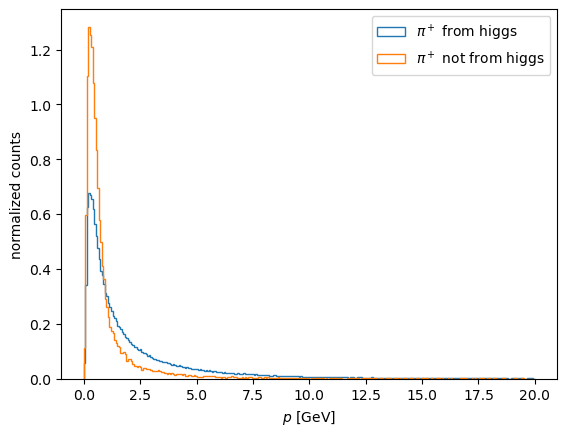

In [155]:
pi_higgs = pion_p[pion_truea]
pi_nohiggs = pion_p[pion_truea != True]

nbins = 300
mini = 0
maxi = 20
# maxi = np.max([np.max(pi_higgs),np.max(pi_nohiggs)])

ifig=1;plt.close(ifig);plt.figure(ifig)
plt.hist(ak.flatten(pi_higgs),bins=nbins,histtype='step',range=(mini,maxi),density=True,label='$\pi^+$ from higgs')
plt.hist(ak.flatten(pi_nohiggs),bins=nbins,histtype='step',range=(mini,maxi),density=True,label='$\pi^+$ not from higgs')

plt.xlabel('$p$ [GeV]')
plt.ylabel('normalized counts')
plt.legend()

In [93]:
elec_p = momentum[((pdgids == 11) | (pdgids == -11)) & (status == 1)]

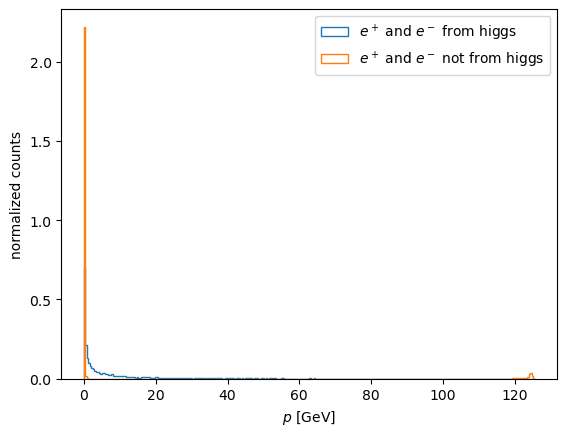

In [156]:
e_higgs = elec_p[particle_truea]
e_nohiggs = elec_p[particle_truea != True]

nbins = 300
mini = 0
# maxi = 20
maxi = np.max([np.max(e_higgs),np.max(e_nohiggs)])

ifig=1;plt.close(ifig);plt.figure(ifig)
plt.hist(ak.flatten(e_higgs),bins=nbins,histtype='step',range=(mini,maxi),density=True,label='$e^+$ and $e^-$ from higgs')
plt.hist(ak.flatten(e_nohiggs),bins=nbins,histtype='step',range=(mini,maxi),density=True,label='$e^+$ and $e^-$ not from higgs')

plt.xlabel('$p$ [GeV]')
plt.ylabel('normalized counts')
plt.legend()

What if I look at the invariant mass of pion pairs?